In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [3]:
NUM_CLASSES = 27

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(72, activation='relu'),  # increased from 20 to 64 neurons
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(36, activation='relu'),  # increased from 10 to 32 neurons
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 72)                  │           3,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 72)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           2,628 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 27)                  │             999 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,723 (26.26 KB)

 Trainable params: 6,723 (26.26 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
18/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0459 - loss: 3.3481
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0457 - loss: 3.3287 - val_accuracy: 0.0428 - val_loss: 3.2025
Epoch 2/1000
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0652 - loss: 3.2052 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0688 - loss: 3.1973 - val_accuracy: 0.0928 - val_loss: 3.0889
Epoch 3/1000
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0871 - loss: 3.1178 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0926 - loss: 3.1026 - val_accuracy: 0.1967 - val_loss: 2.9288
Epoch 4/1000
19/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1498 - loss: 2.9694 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras

Epoch 109/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.5373 - accuracy: 0.7969
Epoch 00109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8379 - val_loss: 0.1955 - val_accuracy: 0.9659
Epoch 110/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3872 - accuracy: 0.8281
Epoch 00110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8505 - val_loss: 0.2020 - val_accuracy: 0.9614
Epoch 111/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.3474 - accuracy: 0.8828
Epoch 00111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 3ms/step - loss: 0.4132 - accuracy: 0.8433 - val_loss: 0.1984 - val_accuracy: 0.9632
Epoch 112/1000
 1/27 [>.............................] - ETA: 0s - loss: 0.4205 

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8406 - loss: 0.6152


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
[1.8088878e-05 2.1796420e-04 7.2153291e-04 8.6031711e-01 2.6861575e-04
 4.2598000e-05 1.5409121e-05 9.8759192e-06 8.1690022e-04 3.9294550e-06
 9.2206072e-05 1.0188569e-02 9.4863302e-05 5.9571161e-05 9.4331848e-04
 4.5030899e-04 6.8877002e-06 7.1421005e-03 6.3291489e-05 1.6953099e-04
 2.9940556e-03 6.9507209e-05 1.4148017e-02 6.9763511e-02 2.2627523e-06
 3.1354710e-02 2.5163808e-05]
3


# 混同行列

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


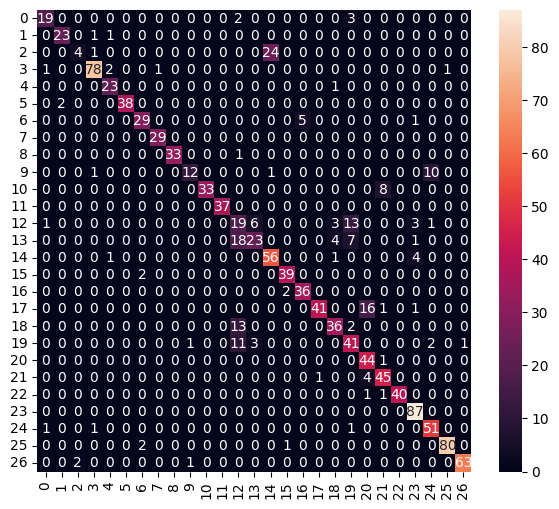

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.92      0.92      0.92        25
           2       0.67      0.14      0.23        29
           3       0.95      0.94      0.95        83
           4       0.85      0.96      0.90        24
           5       1.00      0.95      0.97        40
           6       0.88      0.83      0.85        35
           7       0.97      1.00      0.98        29
           8       1.00      0.97      0.99        34
           9       0.86      0.50      0.63        24
          10       1.00      0.80      0.89        41
          11       1.00      1.00      1.00        37
          12       0.30      0.41      0.35        46
          13       0.72      0.43      0.54        53
          14       0.69      0.90      0.78        62
          15       0.93      0.95      0.94        41
          16       0.88      0.95      0.91        38
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\kenjl\AppData\Local\Temp\tmp2zg5_cn4\assets


INFO:tensorflow:Assets written to: C:\Users\kenjl\AppData\Local\Temp\tmp2zg5_cn4\assets


Saved artifact at 'C:\Users\kenjl\AppData\Local\Temp\tmp2zg5_cn4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 27), dtype=tf.float32, name=None)
Captures:
  1573804050000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1573803161744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1573803160784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1573803154064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1572417109456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1572417108496: TensorSpec(shape=(), dtype=tf.resource, name=None)


13488

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 3.01 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.61305870e-05 2.20435584e-04 7.37975293e-04 8.68408024e-01
 2.56496161e-04 4.05531864e-05 1.36233775e-05 8.64281446e-06
 7.19711650e-04 3.76860999e-06 8.21588546e-05 9.14668012e-03
 8.77284619e-05 5.40596957e-05 9.33489297e-04 3.93854716e-04
 6.41269480e-06 6.31391723e-03 5.93177174e-05 1.55914880e-04
 2.79617659e-03 6.75750780e-05 1.49108022e-02 6.49443194e-02
 1.97742679e-06 2.95960791e-02 2.42222704e-05]
3
